In [1]:
from kunal import *

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170500096/170498071 [==============================] - 190s 1us/step


In [5]:
xtrain.shape

(50000, 32, 32, 3)

In [7]:
xtrain[0].shape

(32, 32, 3)

In [8]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [36]:
xtrain = xtrain/255

In [37]:
xtest = xtest/255

In [19]:
xtrain.shape,xtest.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

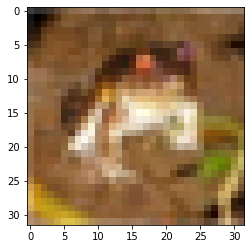

In [27]:
plt.imshow(xtrain1[0])

In [30]:
print(ytrain)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
ytrain_cat = to_categorical(ytrain)

In [33]:
ytest_cat = to_categorical(ytest)

In [34]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
xtrain.shape

(50000, 32, 32, 3)

In [60]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(4,4),strides=(1,1) ,input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size=(4,4),strides=(1,1) ,input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])




In [46]:
from tensorflow.keras.callbacks import EarlyStopping


In [61]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [62]:
model.fit(xtrain,ytrain_cat,validation_data=(xtest,ytest_cat),
         epochs=15,callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.4986 - accuracy: 0.4590 - val_loss: 1.2751 - val_accuracy: 0.5482
Epoch 2/15
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.1651 - accuracy: 0.5903 - val_loss: 1.0745 - val_accuracy: 0.6309
Epoch 3/15
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.0207 - accuracy: 0.6424 - val_loss: 1.0612 - val_accuracy: 0.6322
Epoch 4/15
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.9145 - accuracy: 0.6810 - val_loss: 0.9744 - val_accuracy: 0.6644
Epoch 5/15
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.8323 - accuracy: 0.7069 - val_loss: 0.9429 - val_accuracy: 0.6794
Epoch 6/15
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.7591 - accuracy: 0.7346 - val_loss: 0.9285 - val_accuracy: 0.6893
Epoch 7/15
50000/50000 [==============================] 

In [63]:
metrics = pd.DataFrame(model.history.history)

In [64]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.498632,0.45896,1.275116,0.5482
1,1.165143,0.59026,1.074540,0.6309
2,1.020664,0.64236,1.061152,0.6322
3,0.914490,0.68104,0.974414,0.6644
4,0.832275,0.70688,0.942900,0.6794
5,0.759053,0.73458,0.928453,0.6893
6,0.688634,0.75862,1.031189,0.6598
7,0.623043,0.78198,0.969747,0.6840


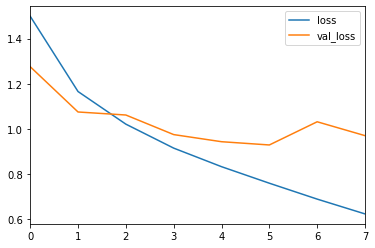

In [65]:
metrics[['loss','val_loss']].plot()

In [66]:
model.evaluate(xtest,ytest_cat,verbose=0)

[0.9697474681854248, 0.684]

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
predictions = model.predict_classes(xtest)
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1000
           1       0.75      0.84      0.79      1000
           2       0.63      0.53      0.57      1000
           3       0.49      0.47      0.48      1000
           4       0.65      0.62      0.64      1000
           5       0.60      0.58      0.59      1000
           6       0.76      0.78      0.77      1000
           7       0.76      0.70      0.72      1000
           8       0.80      0.78      0.79      1000
           9       0.67      0.83      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



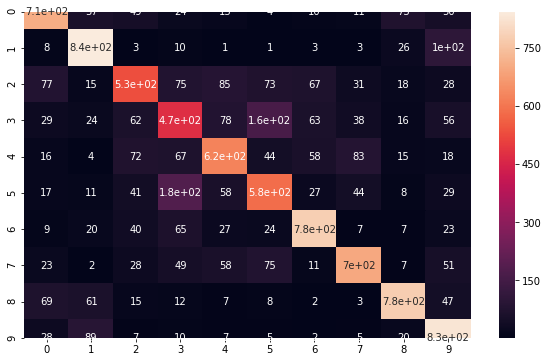

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(ytest,predictions),annot=True)

In [79]:
my_image = xtest[16]

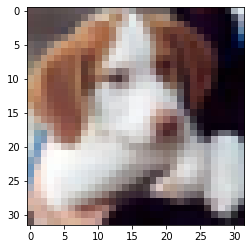

In [80]:
plt.imshow(my_image)

In [82]:
ytest[16]

array([5], dtype=uint8)

In [83]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)